# Assignment 4: Advanced Regression 

## Objective: 

The Ojective of this Assignment is as follows :

    1. Which variables are significant in predicting the price of a house
    2. How well those variables describe the price of a house.
    3. determine the optimal value of lambda for ridge and lasso regression.
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
# Reading the file and 

house_price =  pd.read_csv('train.csv', sep=',')
house_price.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# identifyig columns where all values are NaN

print("Number of columns having all entries Na :",house_price.isna().all(axis = 0).sum())
print("\n Name of columns having all NaN entries :\n")
print(house_price.columns[house_price.isna().all(axis = 0)])

Number of columns having all entries Na : 0

 Name of columns having all NaN entries :

Index([], dtype='object')


NOTE: So we see here that their are no columns where all data is NaN

In [5]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Identifying the columns with nan values percentage.

We can drop these columns, since imputation would not generate a correct result for missing data.

In [6]:

temp = pd.DataFrame((house_price.isna().sum()*100)/len(house_price))
temp.reset_index(drop= False, inplace= True)

In [7]:
temp.columns = ['variable', 'per_missing']
col_to_be_removed = list(temp[temp['per_missing']> 45]['variable'])
col_to_be_removed +=['Id']
print(col_to_be_removed)
del(temp)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id']


In [8]:
house_price.drop(col_to_be_removed, axis ='columns', inplace = True)
house_price.shape

(1460, 75)

In [9]:
house_price.dropna(axis = 0, how='any', inplace=True)
house_price.shape

(1094, 75)

Now we identify the columns that are redundant based on the number of unique values there are in each column

In [10]:
colu = house_price.columns
for col in colu:
    print('---------',col,'----------')
    if house_price[col].nunique() < 20:
        print(house_price[col].unique())
        print(house_price[col].nunique())

--------- MSSubClass ----------
[ 60  20  70  50 190  45 120  30  90  80 160  75 180  40  85]
15
--------- MSZoning ----------
['RL' 'RM' 'C (all)' 'FV' 'RH']
5
--------- LotFrontage ----------
--------- LotArea ----------
--------- Street ----------
['Pave' 'Grvl']
2
--------- LotShape ----------
['Reg' 'IR1' 'IR2' 'IR3']
4
--------- LandContour ----------
['Lvl' 'Bnk' 'Low' 'HLS']
4
--------- Utilities ----------
['AllPub']
1
--------- LotConfig ----------
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
5
--------- LandSlope ----------
['Gtl' 'Mod' 'Sev']
3
--------- Neighborhood ----------
--------- Condition1 ----------
['Norm' 'Feedr' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosN' 'PosA' 'RRNe']
9
--------- Condition2 ----------
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA']
6
--------- BldgType ----------
['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']
5
--------- HouseStyle ----------
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SLvl' '2.5Unf' '2.5Fin' 'SFoyer']
8
--------- OverallQual ----------
[ 7  6  

### Corelation Matrix for Data Understanding 

Converting columns into type "object".

This is done because *CORRELATIOM MATRIX* is calculated for Numerical features and not for catagorical values.


In [11]:
house_price['MSSubClass'] = house_price['MSSubClass'].astype(object) 
house_price['OverallQual'] = house_price['OverallQual'].astype(object) 
house_price['OverallCond'] = house_price['OverallCond'].astype(object) 
house_price['MoSold'] = house_price['MoSold'].astype(object) 
house_price['GarageCars'] = house_price['GarageCars'].astype(object)
house_price['BsmtFullBath'] = house_price['BsmtFullBath'].astype(object)
house_price['BsmtHalfBath'] = house_price['BsmtHalfBath'].astype(object)
house_price['FullBath'] = house_price['FullBath'].astype(object)
house_price['HalfBath'] = house_price['HalfBath'].astype(object)
house_price['BedroomAbvGr'] = house_price['BedroomAbvGr'].astype(object)
house_price['KitchenAbvGr'] = house_price['KitchenAbvGr'].astype(object)
house_price['Fireplaces'] = house_price['Fireplaces'].astype(object)

In [12]:
# getting a list of all numeric columns
list_num = list(house_price.select_dtypes(exclude = 'object'))
df_num = house_price[list_num] 

### Corelation Matrix

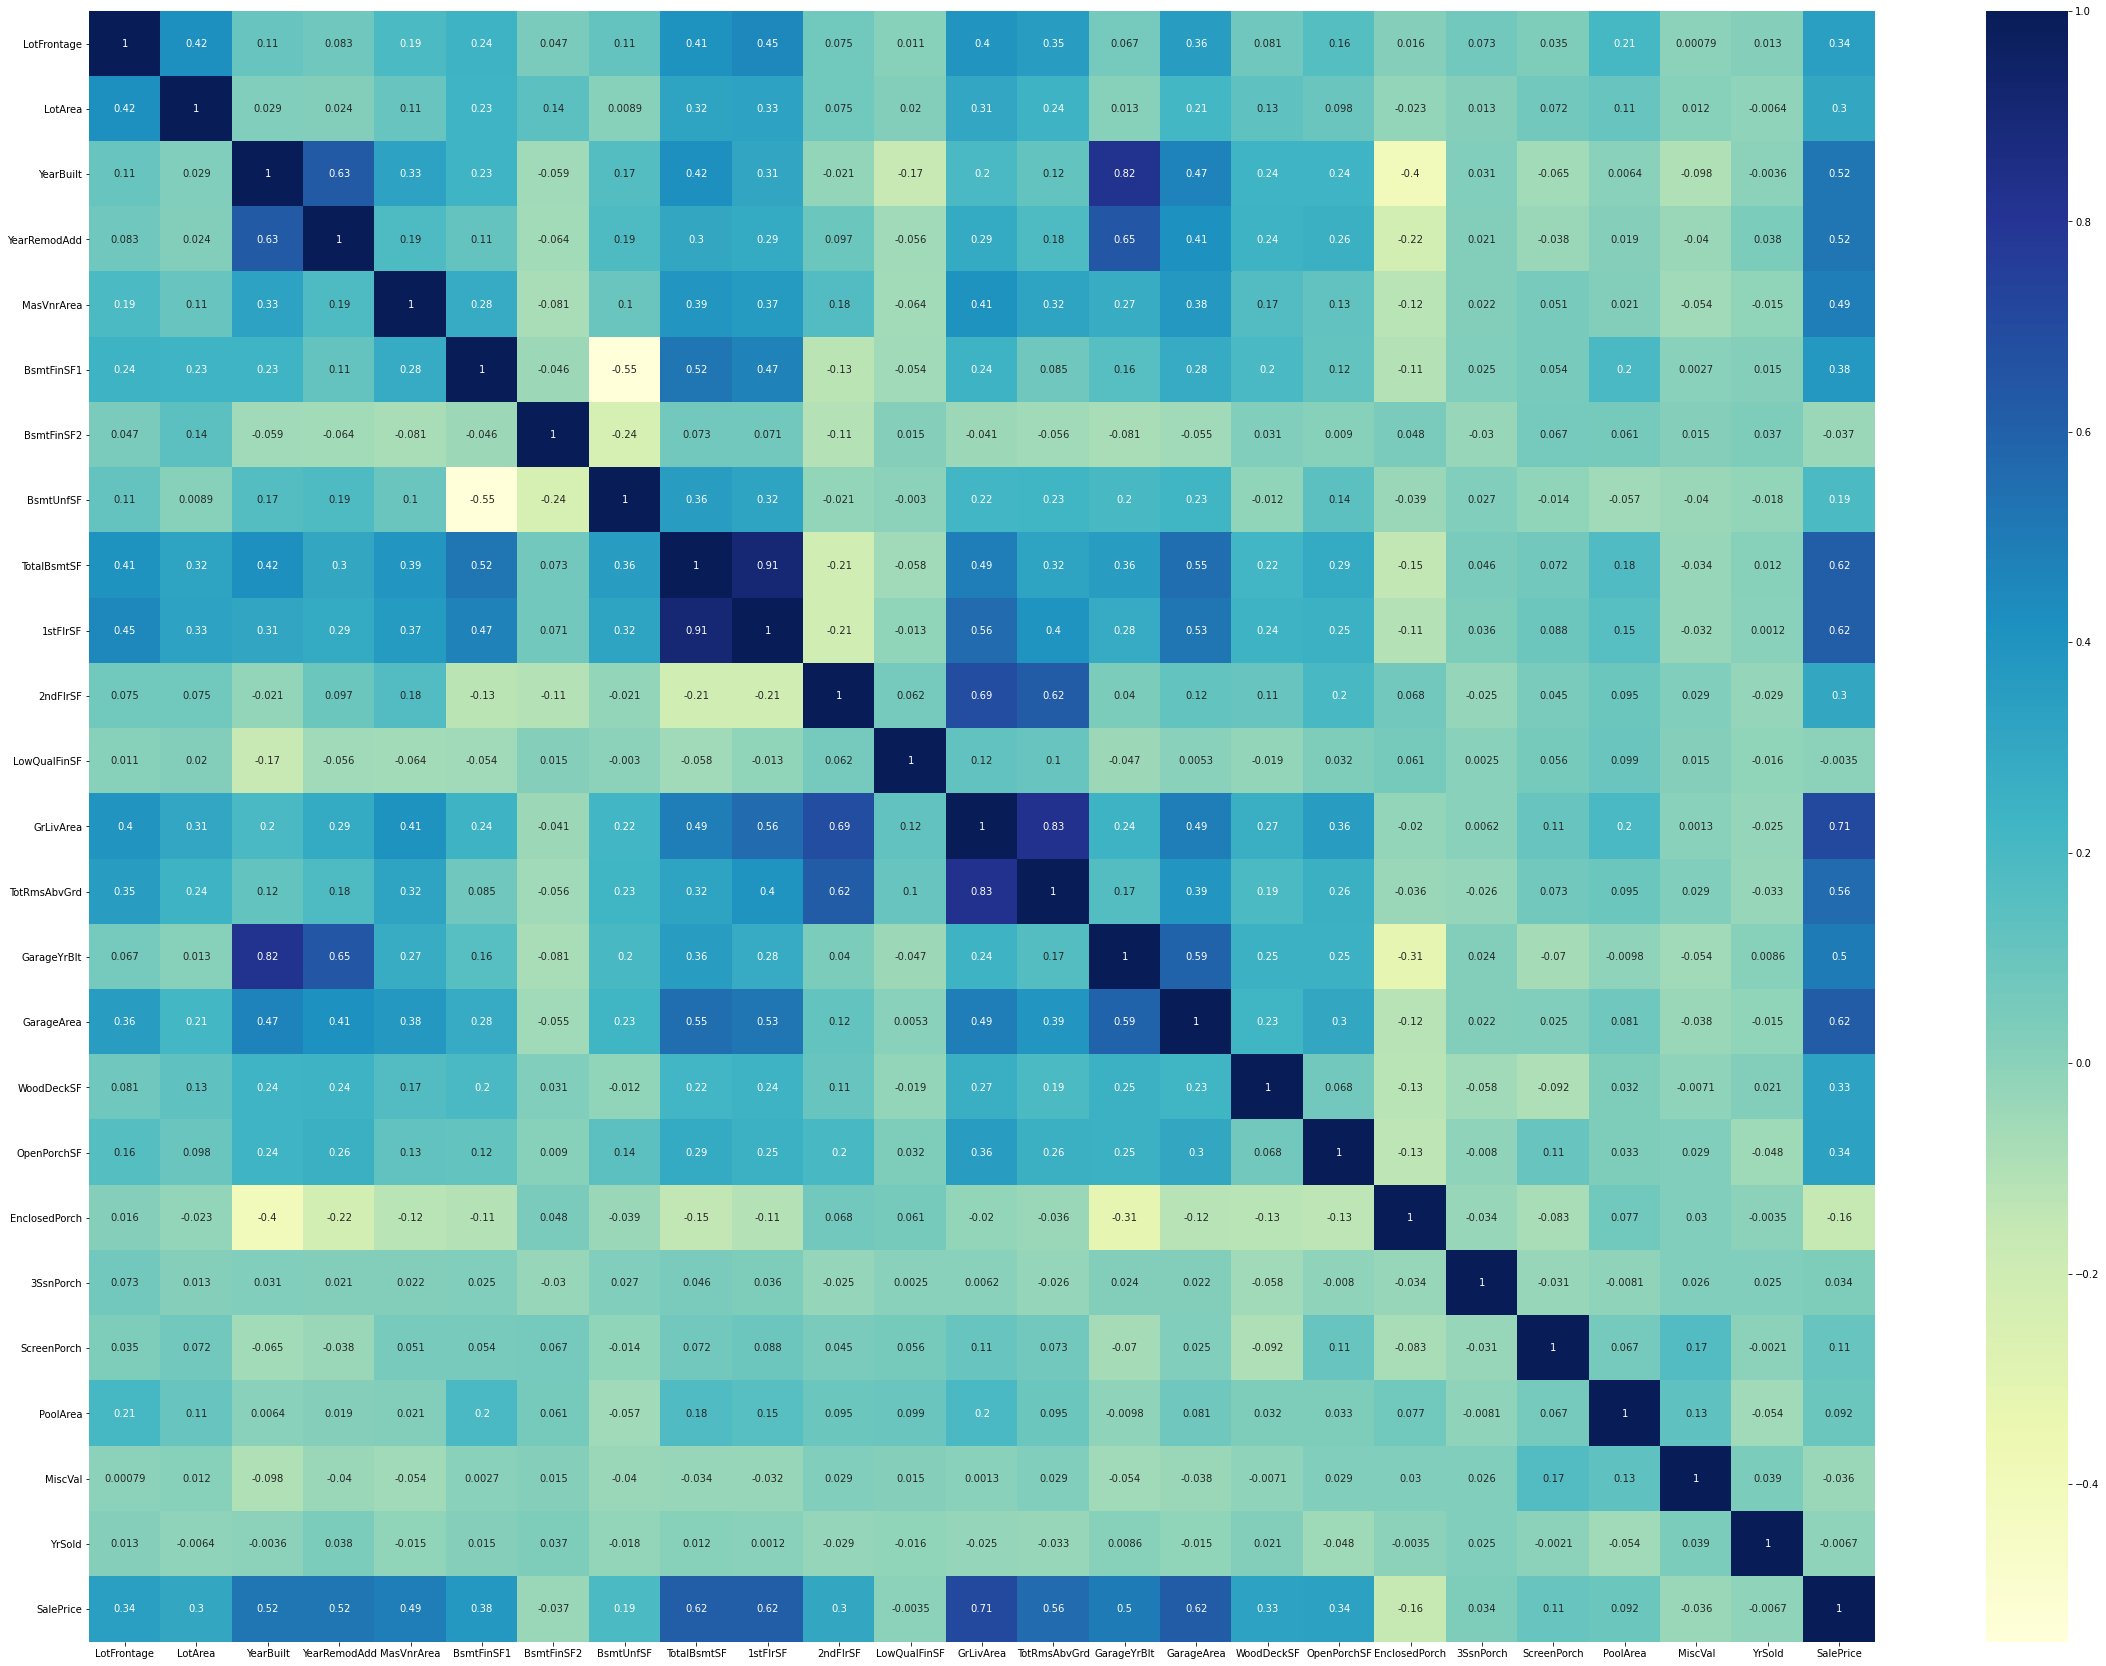

In [13]:
# coorelation matrix for numeric columns
corr_mat = df_num.corr()
plt.figure(figsize = (40, 30))
sns.heatmap(corr_mat, annot = True,cmap="YlGnBu")

From this Matrix it can be observed that following Numerical features have a agrreable corelation with Selling price.

    * "YearBuilt", "MasVnrArea", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "TotRmsAbvGrd",'GarageYrBlt', 'GarageArea', 

### Data Visualizations and plotting 


plotting scatter-plot for highly correlated variables, where corelation value is greater than 0.4 .

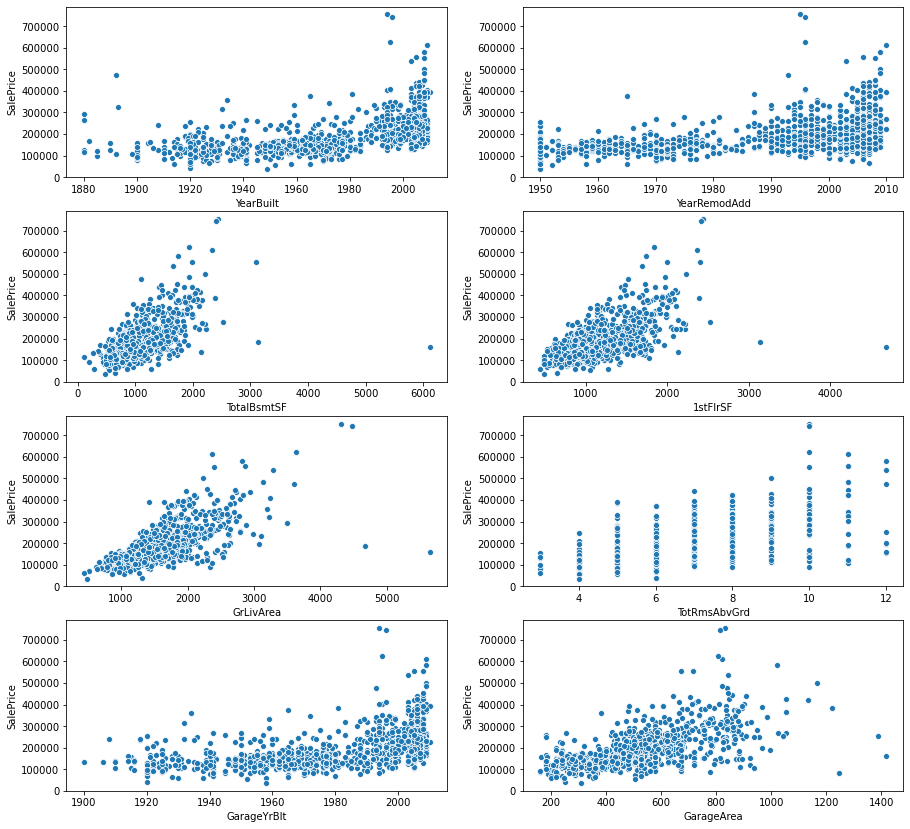

In [14]:
def scatter_plot():
    list_high_corr = corr_mat.loc[abs(corr_mat['SalePrice'])>0.5].index[:-1]    
    plt.figure(figsize=(15, 37))
    i = 1
    for val in list_high_corr:
        #print(i)
        plt.subplot(10,2,i)
        sns.scatterplot(house_price[val],house_price['SalePrice'])
        i = i+1

scatter_plot() 

#### Result and Observations

The following variables tend to show a positive correlation with SalesPrice

        * YearBuilt        # Orignal Construction Date
        * GrLivArea        # Living Area square feet
        * TotRmsAbvGrd     # Total Rooms (dosent include bathroom)
        * TotalBsmtSF      # Total basement area (square feet)
        * GarageArea       # Size of Garage Area
        * 1stFlrSF         # 1st Floor square feet

In [15]:
list_num_n = ['YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd',  
            'GarageArea',  'SalePrice']

# Data frame with relevant numerical features
df_num_n = house_price[list_num_n]

### Box Plot 

Box plot gives us a relationship between Categotical Values and Price

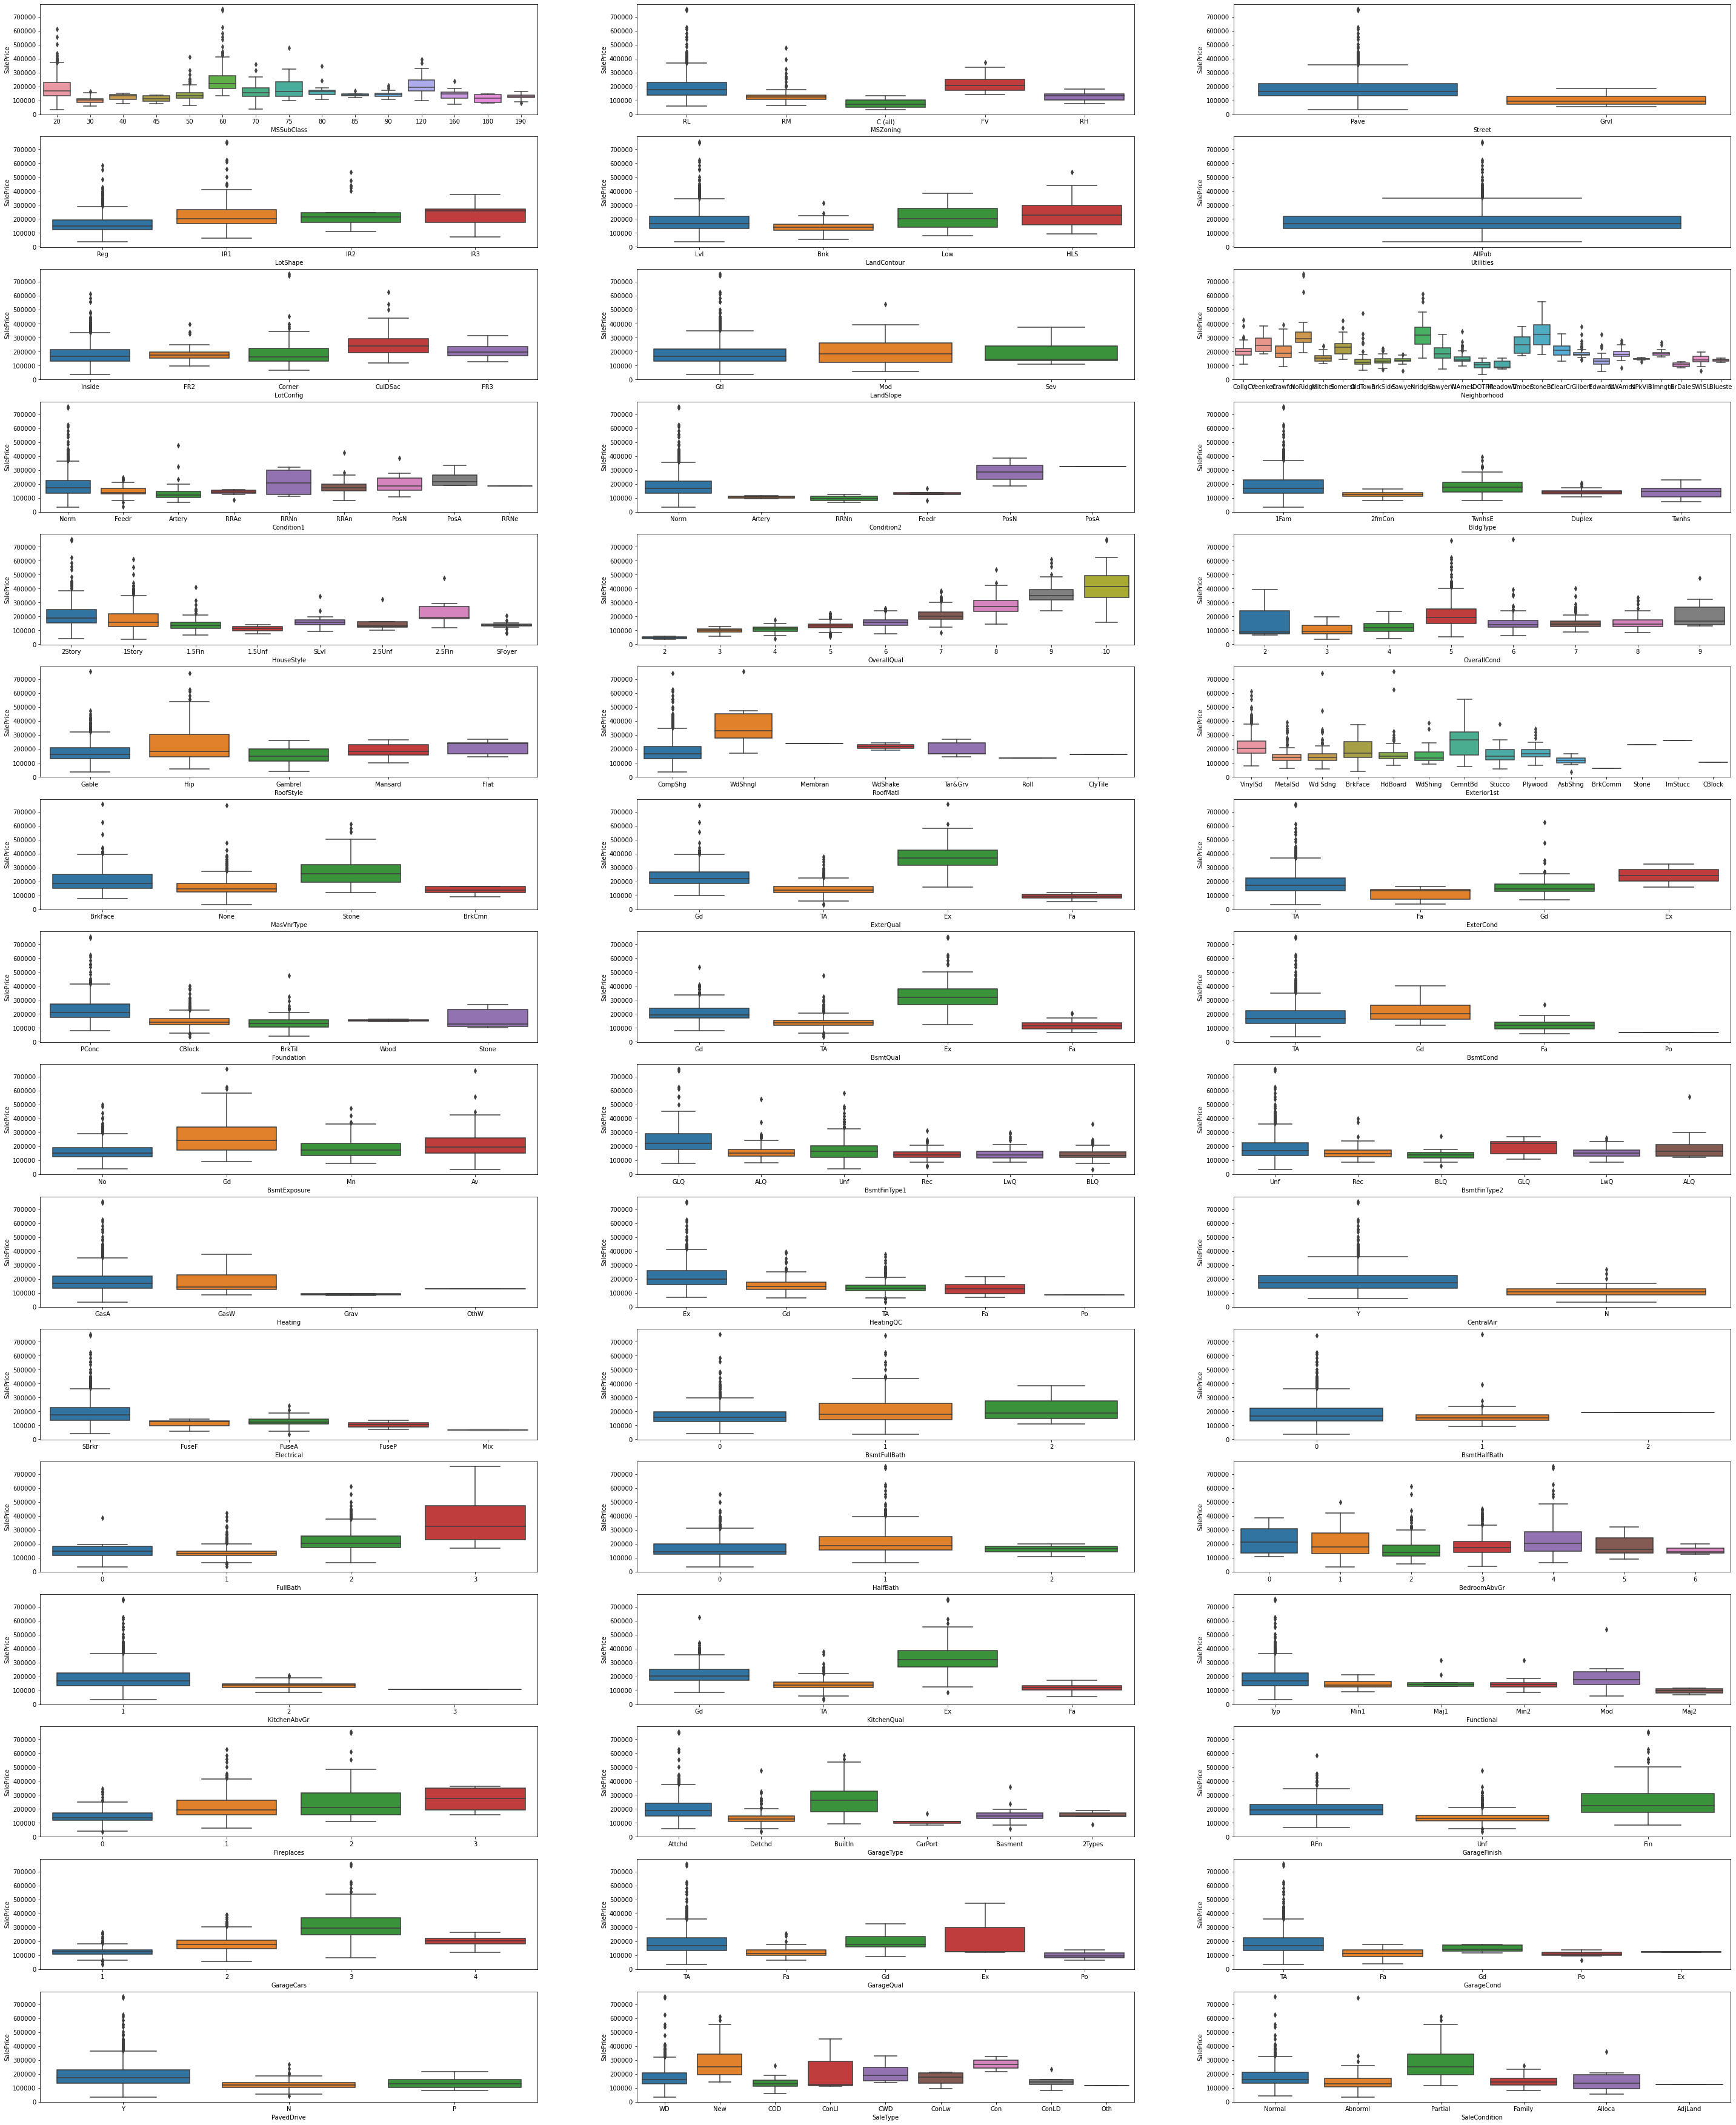

In [16]:
list_category = list(house_price.select_dtypes(include = 'object'))
list_category =[e for e in list_category if e not in ('MoSold','Exterior2nd')]

plt.figure(figsize = (50,120))

i = 1
for cat in list_category:
    plt.subplot(30,3,i)
    sns.boxplot(x = cat, y = 'SalePrice', data = house_price)
    i = i+1


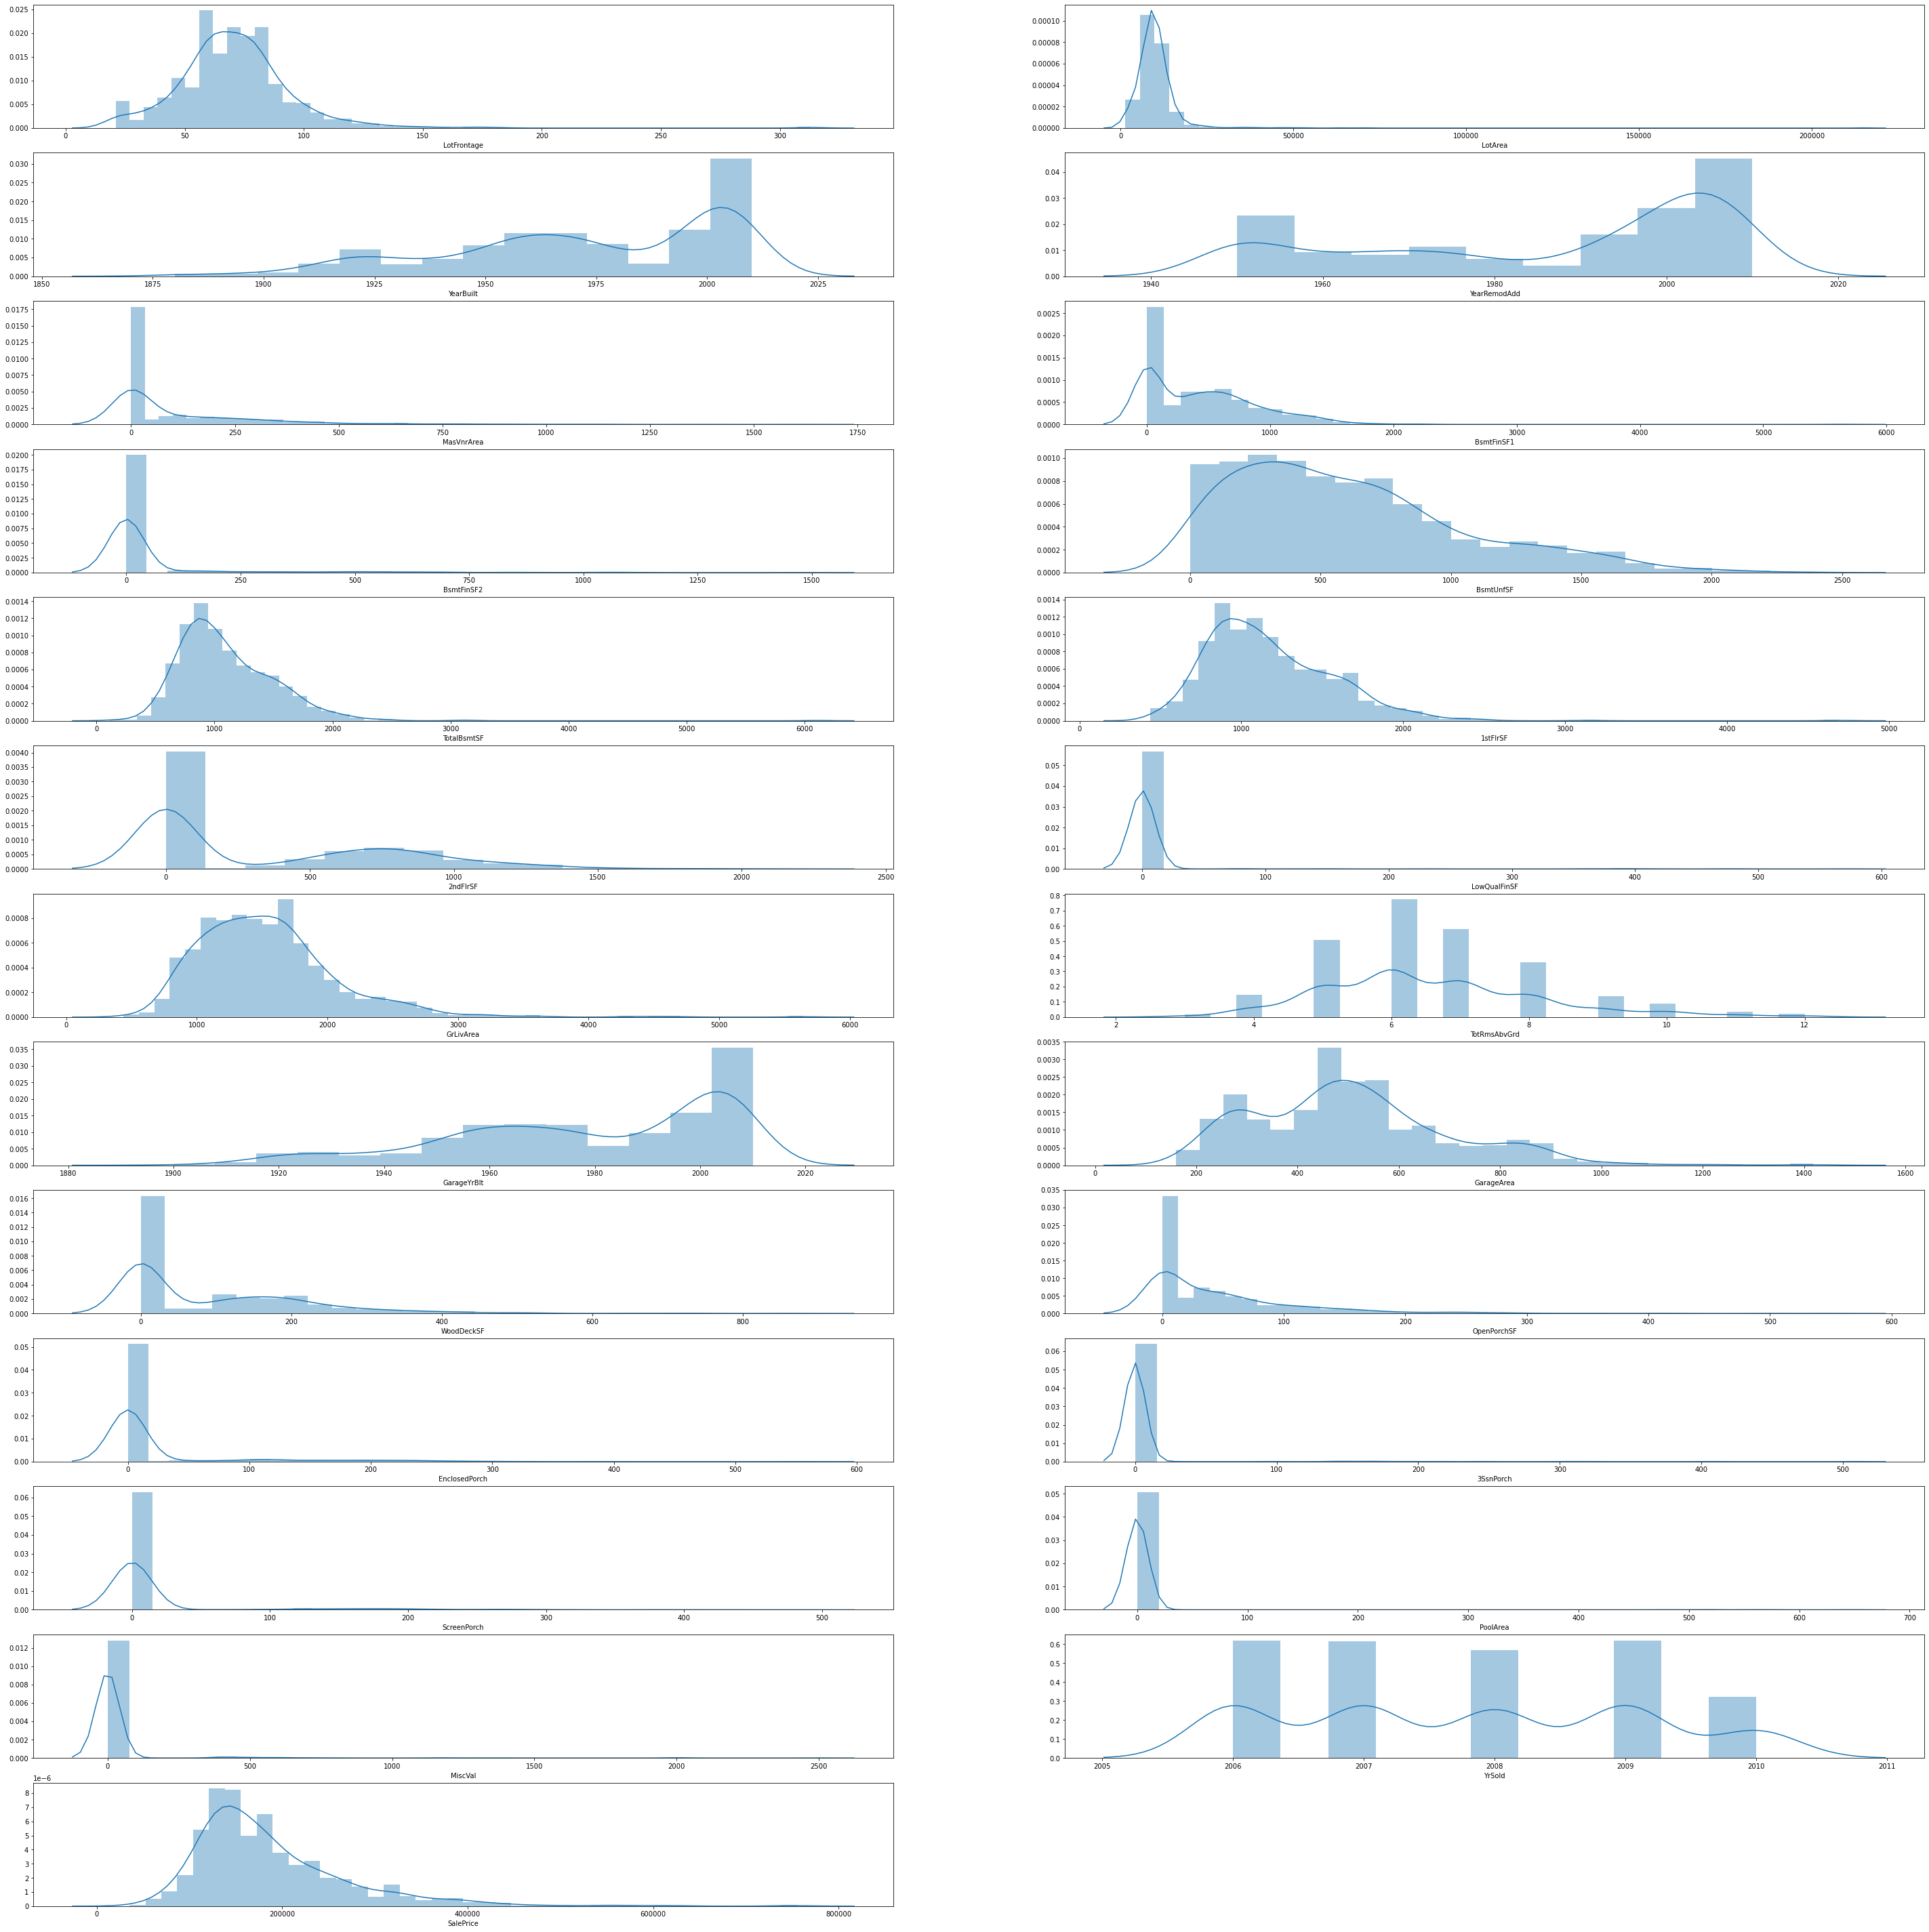

In [17]:
# Distribution plots for numeric features

plt.figure(figsize = (50,120))

i = 1
for cat in list_num:
    plt.subplot(30,2,i)
    try:
        sns.distplot(house_price[cat])
        i = i+1
    except:
        pass


### Pair Plot 

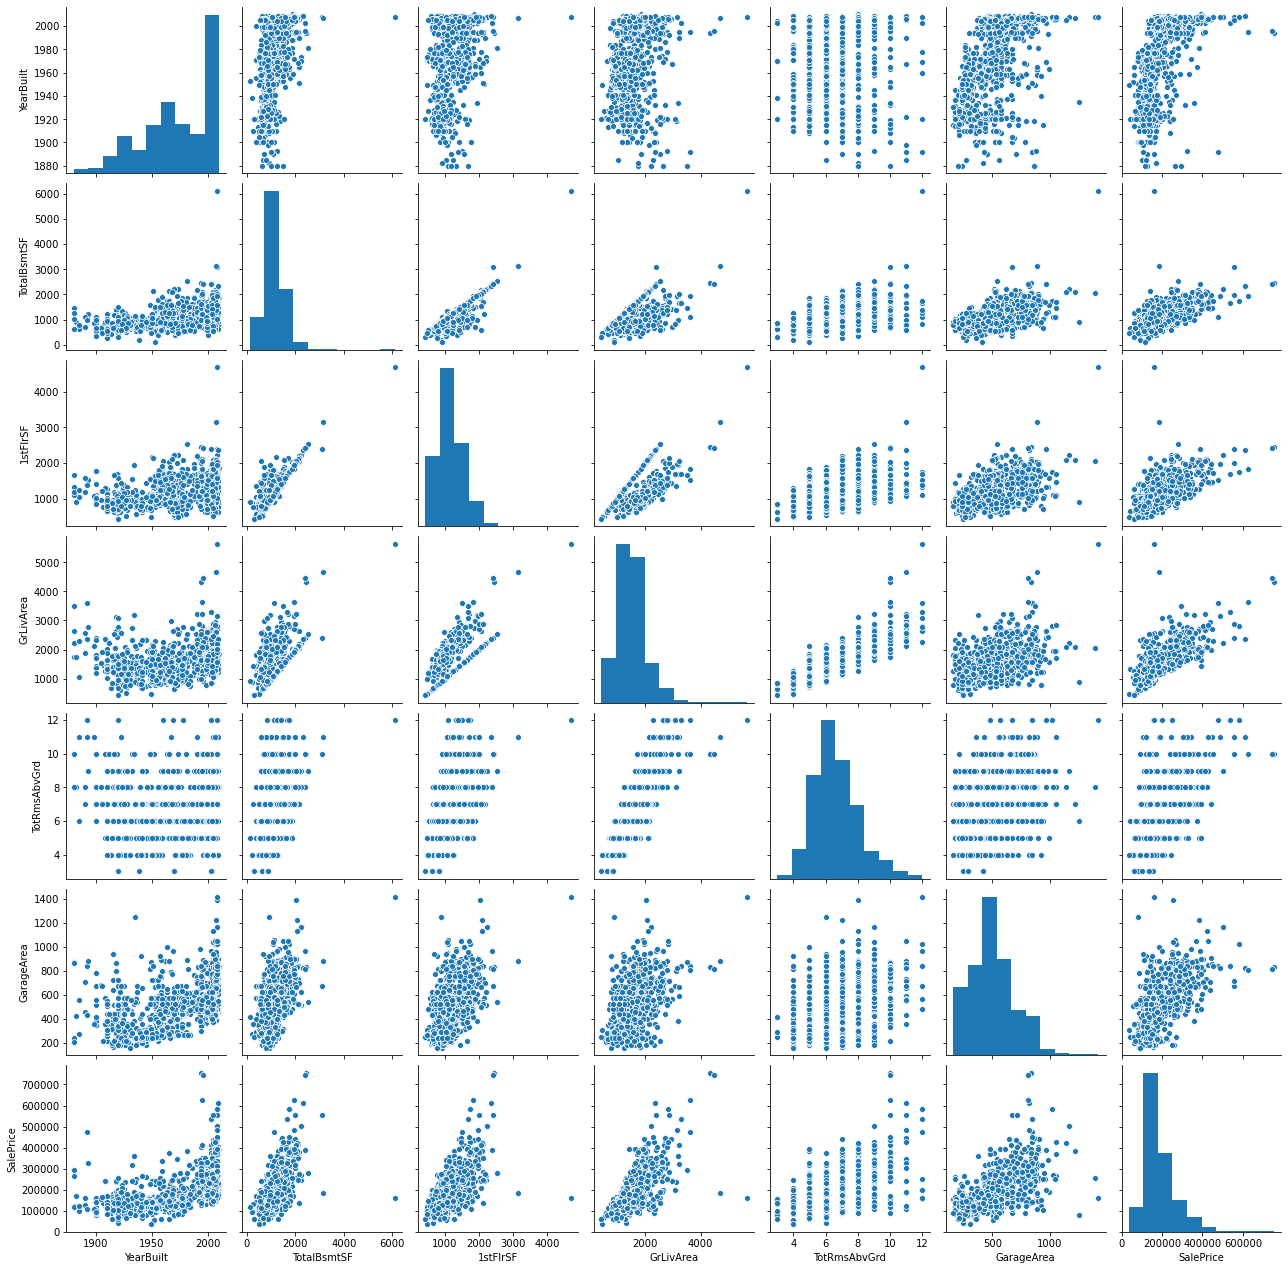

In [18]:
# pair plot of numeric varaibles

sns.pairplot(df_num_n)

In [19]:
final_feature_list = list_num_n + list_category
print(len(final_feature_list))
house_price_final = house_price[final_feature_list]
house_price_final.shape

55


(1094, 55)

In [20]:
# List of columns that are of type 'object'
category_encode = list_category

# Function for One-Hot Encoding of catagories 
def hot_encoding(x):
     dummy_df = "{0}_dummies".format(x)
     dummy_df = pd.get_dummies(house_price_final[x], drop_first= True) #drop_first create n-1 dummy
     dummy_df = dummy_df.add_suffix("_"+str(x))
     return(dummy_df)

for l in category_encode:    
     z = '{0}_dummies'.format(l)
     z = pd.DataFrame()
    # this command excecutes the function created.
     exec('z = hot_encoding(l)')
     house_price_final = pd.concat([house_price_final,z],axis=1)
     house_price_final.drop([l], axis = 1, inplace = True)

In [21]:
y = house_price_final['SalePrice']
X = house_price_final.drop('SalePrice',axis = 1)

### Feature Scaling 

In [22]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.head()

,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,30_MSSubClass,40_MSSubClass,45_MSSubClass,50_MSSubClass,...,ConLI_SaleType,ConLw_SaleType,New_SaleType,Oth_SaleType,WD_SaleType,AdjLand_SaleCondition,Alloca_SaleCondition,Family_SaleCondition,Normal_SaleCondition,Partial_SaleCondition
0,0.981147,-0.585961,-0.820154,0.332721,0.902671,0.230206,-0.211873,-0.052438,-0.091077,-0.341067,...,-0.052438,-0.060578,-0.344397,-0.030248,0.422941,-0.030248,-0.074261,-0.129339,0.493135,-0.349358
1,0.115082,0.390796,0.227587,-0.519179,-0.360145,-0.227714,-0.211873,-0.052438,-0.091077,-0.341067,...,-0.052438,-0.060578,-0.344397,-0.030248,0.422941,-0.030248,-0.074261,-0.129339,0.493135,-0.349358
2,0.916994,-0.431989,-0.654993,0.477240,-0.360145,0.542424,-0.211873,-0.052438,-0.091077,-0.341067,...,-0.052438,-0.060578,-0.344397,-0.030248,0.422941,-0.030248,-0.074261,-0.129339,0.493135,-0.349358
3,-1.841583,-0.826542,-0.549186,0.346032,0.271263,0.719348,-0.211873,-0.052438,-0.091077,-0.341067,...,-0.052438,-0.060578,-0.344397,-0.030248,0.422941,-0.030248,-0.074261,-0.129339,-2.027844,-0.349358
4,0.884918,0.109317,-0.074348,1.260683,1.534080,1.728852,-0.211873,-0.052438,-0.091077,-0.341067,...,-0.052438,-0.060578,-0.344397,-0.030248,0.422941,-0.030248,-0.074261,-0.129339,0.493135,-0.349358


In [23]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building & Evaluation 

### Ridge and Lasso Regression 

In [24]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 2000, 4000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 2000, 4000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [25]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009085,1.579603e-03,0.001203,4.108213e-04,0.0001,{'alpha': 0.0001},0.308794,0.874709,0.901689,0.478560,...,0.572102,0.266118,30,0.962182,0.954907,0.952245,0.955295,0.954631,0.955852,0.003340
1,0.007180,3.983498e-04,0.000997,1.168008e-07,0.001,{'alpha': 0.001},0.308926,0.874728,0.901705,0.478592,...,0.572180,0.266059,29,0.962182,0.954907,0.952245,0.955295,0.954631,0.955852,0.003340
2,0.006981,1.168008e-07,0.000997,1.907349e-07,0.01,{'alpha': 0.01},0.310240,0.874912,0.901864,0.478902,...,0.572950,0.265468,28,0.962182,0.954907,0.952245,0.955294,0.954631,0.955852,0.003340
3,0.008969,3.089915e-03,0.001204,3.957290e-04,0.05,{'alpha': 0.05},0.316015,0.875604,0.902463,0.480159,...,0.576189,0.262921,27,0.962179,0.954900,0.952241,0.955294,0.954628,0.955848,0.003341
4,0.007379,4.879749e-04,0.001197,3.987797e-04,0.1,{'alpha': 0.1},0.323095,0.876269,0.903041,0.481534,...,0.579927,0.259878,26,0.962173,0.954884,0.952230,0.955291,0.954621,0.955840,0.003342


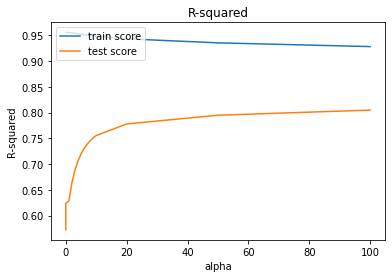

In [26]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-squared')
plt.title("R-squared")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [27]:
best_value_alpha = model_cv.best_params_['alpha']
model_cv.best_params_['alpha']

500

In [28]:
from sklearn.metrics import r2_score
import numpy as np
alpha = 500 #best_value_alpha
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[list(X_train)], y_train)
Ridge_coef_dataframe = pd.DataFrame(list(zip(X_train.columns,ridge.coef_)))
Ridge_coef_dataframe.columns = ['variable', 'coeff']
Ridge_coef_dataframe['abs_coeff'] = np.abs(Ridge_coef_dataframe['coeff'])
Ridge_coef_dataframe.sort_values(by = ['abs_coeff'], ascending = False, inplace = True)
Ridge_coef_dataframe.head(50)


,variable,coeff,abs_coeff
3,GrLivArea,8740.875468,8740.875468
173,3_FullBath,7523.025671,7523.025671
92,10_OverallQual,7153.973027,7153.973027
91,9_OverallQual,6613.637975,6613.637975
203,3_GarageCars,6005.387476,6005.387476
51,NoRidge_Neighborhood,5848.432400,5848.432400
2,1stFlrSF,5630.665194,5630.665194
4,TotRmsAbvGrd,4828.403994,4828.403994
142,Gd_BsmtExposure,4520.111874,4520.111874
193,2_Fireplaces,4328.263322,4328.263322


In [40]:
from sklearn.metrics import r2_score
import numpy as np
alpha = 1000 #best_value_alpha
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[list(X_train)], y_train)
Ridge_coef_dataframe = pd.DataFrame(list(zip(X_train.columns,ridge.coef_)))
Ridge_coef_dataframe.columns = ['variable', 'coeff']
Ridge_coef_dataframe['abs_coeff'] = np.abs(Ridge_coef_dataframe['coeff'])
Ridge_coef_dataframe.sort_values(by = ['abs_coeff'], ascending = False, inplace = True)
Ridge_coef_dataframe.head(11)


,variable,coeff,abs_coeff
3,GrLivArea,7254.953036,7254.953036
92,10_OverallQual,6052.139679,6052.139679
173,3_FullBath,5893.236986,5893.236986
203,3_GarageCars,5378.158948,5378.158948
2,1stFlrSF,5049.569010,5049.569010
91,9_OverallQual,5024.799072,5024.799072
51,NoRidge_Neighborhood,4733.104406,4733.104406
4,TotRmsAbvGrd,4529.858637,4529.858637
1,TotalBsmtSF,4121.422482,4121.422482
5,GarageArea,3727.224804,3727.224804


In [29]:
y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8919432955436296
0.8455128694414888


### Lasso Regression

In [30]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   11.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 2000, 4000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [31]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.087059,0.025346,0.001191,0.000387,0.0001,{'alpha': 0.0001},0.308681,0.875373,0.901363,0.484199,...,0.574232,0.264833,30,0.96218,0.954882,0.95223,0.955294,0.954624,0.955842,0.003344
1,0.084782,0.020738,0.001382,0.000471,0.001,{'alpha': 0.001},0.308683,0.875374,0.901366,0.484205,...,0.574235,0.264833,29,0.96218,0.954882,0.95223,0.955294,0.954624,0.955842,0.003344
2,0.081994,0.020650,0.001383,0.000472,0.01,{'alpha': 0.01},0.308698,0.875381,0.901387,0.484269,...,0.574261,0.264827,28,0.96218,0.954882,0.95223,0.955294,0.954624,0.955842,0.003344
3,0.085231,0.021903,0.001197,0.000399,0.05,{'alpha': 0.05},0.308767,0.875411,0.901480,0.484555,...,0.574380,0.264800,27,0.96218,0.954882,0.95223,0.955294,0.954624,0.955842,0.003344
4,0.081988,0.019075,0.000996,0.000002,0.1,{'alpha': 0.1},0.308852,0.875449,0.901593,0.484902,...,0.574526,0.264765,26,0.96218,0.954881,0.95223,0.955294,0.954624,0.955842,0.003344


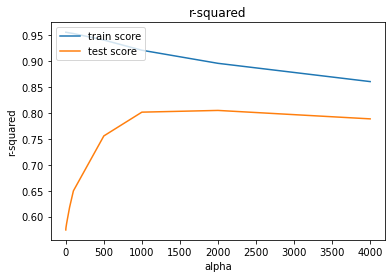

In [32]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r-squared')

plt.title("r-squared")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [33]:
best_value_alpha = model_cv.best_params_['alpha']
model_cv.best_params_['alpha']

2000

In [37]:
alpha =  2000 #best_value_alpha

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[list(X_train)], y_train) 


lasso_coef_dataframe = pd.DataFrame(list(zip(X_train.columns,lasso.coef_)))
lasso_coef_dataframe.columns = ['variable', 'coeff']
lasso_coef_dataframe['abs_coeff'] = np.abs(lasso_coef_dataframe['coeff'])
lasso_coef_dataframe.sort_values(by = ['abs_coeff'], ascending = False, inplace = True)
lasso_coef_dataframe.head(50)

,variable,coeff,abs_coeff
3,GrLivArea,29858.299855,29858.299855
91,9_OverallQual,13027.138297,13027.138297
203,3_GarageCars,10661.614804,10661.614804
92,10_OverallQual,9436.711441,9436.711441
173,3_FullBath,8197.923652,8197.923652
0,YearBuilt,7328.388726,7328.388726
142,Gd_BsmtExposure,6571.991027,6571.991027
128,TA_ExterQual,-5629.790836,5629.790836
51,NoRidge_Neighborhood,5131.251342,5131.251342
90,8_OverallQual,4933.503074,4933.503074


In [41]:
alpha =  4000 #best_value_alpha

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[list(X_train)], y_train) 


lasso_coef_dataframe = pd.DataFrame(list(zip(X_train.columns,lasso.coef_)))
lasso_coef_dataframe.columns = ['variable', 'coeff']
lasso_coef_dataframe['abs_coeff'] = np.abs(lasso_coef_dataframe['coeff'])
lasso_coef_dataframe.sort_values(by = ['abs_coeff'], ascending = False, inplace = True)
lasso_coef_dataframe.head(11)

,variable,coeff,abs_coeff
3,GrLivArea,29323.732757,29323.732757
203,3_GarageCars,12009.783898,12009.783898
91,9_OverallQual,10963.151181,10963.151181
92,10_OverallQual,8441.774721,8441.774721
0,YearBuilt,7528.413146,7528.413146
173,3_FullBath,7397.258969,7397.258969
128,TA_ExterQual,-6842.096564,6842.096564
146,GLQ_BsmtFinType1,5257.833135,5257.833135
142,Gd_BsmtExposure,4702.033128,4702.033128
2,1stFlrSF,4608.742457,4608.742457


In [35]:
y_train_pred = lasso.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = lasso.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8872699971859939
0.8139130862017184


## Result and Conclusions 

#### Ridge

The 10 important features according to Ridge regression is:

    * GrLivArea
    * FullBath : with category '3' has a greater impact on price
    * OverallQual : with rating 10 and rating 9 has an impact on price
    * GarageCars : with car space of 3 impacts the Price
    * Neighborhood : properties  around 'NoRidge' (North Ridge)
    * 1stFlrSF : First floor in square feet 
    * TotRmsAbvGrd: Total rooms above ground 
    * BsmtExposure: this feature of category "Gd (Good Exposure)" has a positive impact as well
    * Fireplaces: number of fireplaces too impacts the Price
    * RoofMatl: this feature Roof Material of quality "WdShngl (Wood Shingles)" impacts Price
    * TotalBsmtSF: Total square feet of basement area does impact Price
    
#### Lasso 

    * GrLivArea	
    * OverallQual : with rating 10,9 and rating 8 has an impact on price
    * GarageCars:	with car space of 3 impacts the Price
    * FullBath:	with category '3' has a greater impact on price
    * YearBuilt: year in which property was built is also considered 
    * BsmtExposure: this feature of category "Gd (Good Exposure)" has a positive impact as well
    * ExterQual: quality of the material on the exterior marked as TA (Average/Typical)
    * Neighborhood:	properties  around 'NoRidge' (North Ridge), StoneBr, NridgHt
    * BsmtFinType1: Rating of basement finished area, GLQ
    * RoofMatl: this feature Roof Material of quality "WdShngl (Wood Shingles)" impacts Price
    
#### Value of Lambda for Ridge and Lasso

    * For Ridge optimal value is  :  500
    * For Lasso optimal value is  :  2000
    